# Project Overview : Biodiversity in National Parks

In this project, the focus is on data about endangered species in different parks from the National Parks Service. 

# The Goal

The goal of this project is to find patterns or themes to the types of species that become endangered.
To do this, we will need to utilize our past knowledge of data visualization and new knowledge on cleaning up the data that is
given to us and seek to answer all of our questions in a meaningful way!

# Questions that we want answers to:

- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

# Provided Data

There are two csv files provided for us by Codecademy to use for this project. The first csv file contains information about species and the second one contains information about the parks.

# Analysis 

We will be using data visualizations alongside aggregate statistics that will be enforced in our data to make it more clear to 
readers. 
This will include:
- Distributions between variables
- Counts
- Relationships & More

# Importing our Python Modules

We will import the necessary modules(seaborn, matplotlib, etc.) to help aid us in our project!

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Getting the Data

We will load these datasets with the help of Pandas in order for us to use this data in our Python program.
Below, both of our csv files will be loaded into variables and will display a few rows of data with the pd.head() line:

Species -- Species.csv

Contains information on the following:
- Category: The type of species it is (Mammal, Bird, Fish, etc.)
- Scientific Name: The scientific name of the species
- Common Names: The common names of the species
- Conservation Status: The conservation status of the species

In [2]:
species_data = pd.read_csv('species_info.csv',encoding='utf-8')
species_data.head() # Displays the first five rows of data from species_data

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Observations

The observations.csv file contains the following info:
- Scientific Name: The scientific name of the species
- Park Name: The name of the national park
- Observations: The amount of observations in the past 7 days(or 1 week)

In [4]:
observations_data = pd.read_csv('observations.csv', encoding='utf-8')
observations_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Observing our current data

In [5]:
print("The amount of rows in the species data is: " + str(len(species_data)))
print("The amount of rows in the observations data is: " + str(len(observations_data)))

The amount of rows in the species data is: 5824
The amount of rows in the observations data is: 23296


In [7]:
print("The number of species in our data is: " + str(species_data.scientific_name.nunique()))

The number of species in our data is: 5541


Let's show how many different categories we have for our species below:

In [8]:
print("Number of categories: " + str(species_data.category.nunique())) # Outputs the number of categories
print("List of categories: " + str(species_data.category.unique())) #Outputs the list of different categories(not the amount!)

Number of categories: 7
List of categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


From the data below, it seems like the most of the species are classified as Vascular Plant (4470), while reptiles are the least common in our dataset (79):

In [12]:
species_data.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Now, let's look at some details about the converstation status of our species:

In [16]:
print("Number of conservation statuses: " + str(species_data.conservation_status.nunique())) # Outputs the number of conservation statuses
print("List of conservation statuses: " + str(species_data.conservation_status.unique())) #Outputs the list of different conservation statuses(not the amount!)

print("NA Values: " + str(species_data.conservation_status.isna().sum()))
print("Amount in each status: " + str(species_data.groupby("conservation_status").size()))

Number of conservation statuses: 4
List of conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
NA Values: 5633
Amount in each status: conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Let's see how many observations we have from our observations_data:

In [21]:
print("We have " + str(observations_data.park_name.nunique()) + " parks")
print("List of Unique Parks: " + str(observations_data.park_name.unique()))
print("There are over " + str(observations_data.observations.sum()) + " observations in our data.") 

We have 4 parks
List of Unique Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
There are over 3314739 observations in our data.


There was quite a lot of observations in the past week with over 3,314,739!

# Analyzing Our Data

We will start analyzing our data after observing a few statistics on some of the data but we do need to clean some data
in the conservation_status since there were nan values(nan means not a number):

These are the different statuses and what they mean:
- Species of Concern: This means the species is declining in health and/or at the brink of conservation
- Threatened: Species is highly likely to being endangered soon
- Endangered: At extreme levels of risk of extinction
- In Recovery: Little to no risk of being endangered for the forseeable future

In [24]:
species_data.fillna('No Intervention', inplace=True) #Replace all nan values with 'No Intervention'
species_data.groupby('conservation_status').size() # There are 5,633 species that have No Intervention!

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Now let's look at the conservation status for the different types of species we are covering: 

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0.5, 1.0, 'Species and their Conservation Statuses')

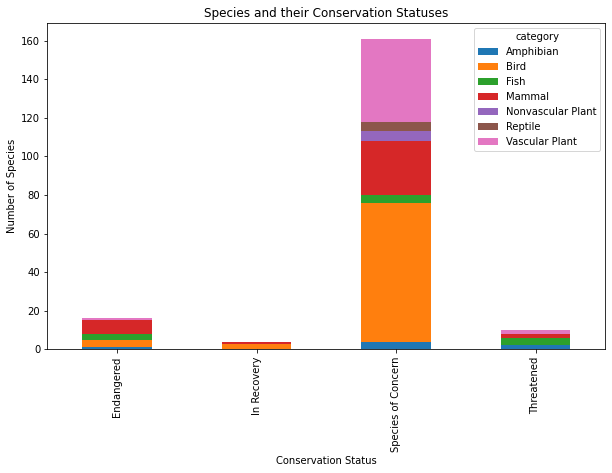

In [37]:
conservation_types = species_data[species_data.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

print(conservation_types)

bar = conservation_types.plot(kind='bar', figsize=(10, 6), stacked=True)
bar.set_xlabel("Conservation Status")
bar.set_ylabel("Number of Species")
bar.set_title("Species and their Conservation Statuses")

# Conclusions from Question 1

From the data above, it seems like Birds are making a major comeback since there are 3 recovering. However, they also hold
the largest amount under Species of Concern with 72.0 so that is quite interesting to look at.
Mammals are also concerning since they make up the majority of endangered species with the amount of 7.

# Species vs. Endangered?

In [43]:
# New Column to show whether or not a species is protected or not
species_data['protect_status'] = species_data.conservation_status != 'No Intervention'


protect_counts = species_data.groupby(['category', 'protect_status'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='protect_status',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
protect_counts.columns = ['category', 'not_protected', 'protected']

protect_counts['percent_protected'] = protect_counts.protected / \
                                      (protect_counts.protected + protect_counts.not_protected) * 100

print(protect_counts)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           8.860759
1               Bird            413         75          15.368852
2               Fish            115         11           8.730159
3             Mammal            146         30          17.045455
4  Nonvascular Plant            328          5           1.501502
5            Reptile             73          5           6.410256
6     Vascular Plant           4216         46           1.079305


So from this data, it definitely shows that the highest percentages of species that are protected are Birds, Mammals, Amphibians and Fish. While Vascular Plant species have the second highest amount of protected (46), they have the lowest percentage due to their overwhelming amount of them not being protected (4216).

# Statistical Significance of Species and their Conservation Status

In [45]:
from scipy.stats import chi2_contingency

contingency_species = [[30, 146], # Values from mammals
              [75, 413]] # Values from birds
chi2_contingency(contingency1) # Compute the chi square test

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The value to aim for in these chi2 square test is 0.05 or lower. The value provided in this data is roughly around 0.69 which 
indicates there is no relationship between mammals and birds, meaning they are independent of each other.

In [46]:
con_2 = [[30, 146],
    [7, 72]]
 
chi2_contingency(con_2)

(2.321746712946015,
 0.12757669693198975,
 1,
 array([[ 25.5372549, 150.4627451],
        [ 11.4627451,  67.5372549]]))

In the code above, we can see that the value between mammals and amphibians is around 0.13, much lower than the 0.69 amount from earlier but still shows that there is little to no relationship between the two

# Species at the Park

We will need to split up some of our data and clean it up below:

In [50]:
from itertools import chain
import string

# The following function will remove punctuation such as , with whitespace ' '
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species_data[species_data.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6] #Gets the common names up to(not including) the 6th index of the name!

cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]


# Compile into one list to make it easier to understand
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now we can finally start finishing our final question below:

In [52]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)
# Show the data below, most of them are bats, followed by shrews and myotis

,Word,Count
37,Bat,23
176,Shrew,18
66,Myotis,17
198,Mouse,16
161,Chipmunk,13
40,Squirrel,12
39,American,12
54,Vole,11
141,Eastern,11
101,Western,10


In [77]:
species_data['is_bat'] = species_data.common_names.str.contains(r"\bBat\b", regex = True)

species_data.head(10) # Shows the first 10 rows of data 

,category,scientific_name,common_names,conservation_status,protect_status,is_mouse,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,False


In [78]:
# Show all the instances of is_mouse == True
species_data[species_data.is_bat]

,category,scientific_name,common_names,conservation_status,protect_status,is_mouse,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,False,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,False,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,False,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,False,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,False,True


In [79]:
# Merging data below...

count_bats = observations_data.merge(species_data[species_data.is_bat])
count_bats

,scientific_name,park_name,observations,category,common_names,conservation_status,protect_status,is_mouse,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,False,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,False,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,False,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,False,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True


In [80]:
obs_by_park = count_bats.groupby(['park_name', 'protect_status']).observations.sum().reset_index()
obs_by_park

,park_name,protect_status,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


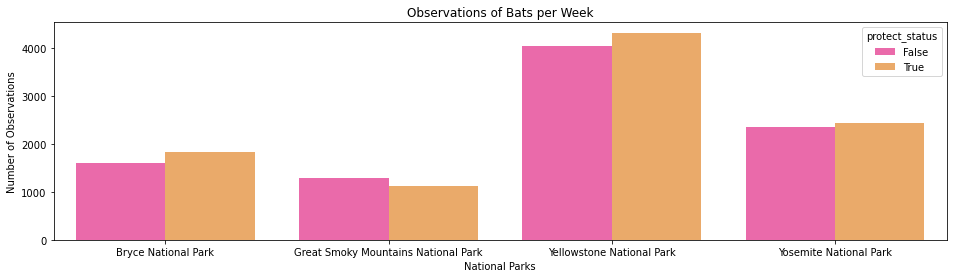

In [82]:
# Show a barplot
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.protect_status, palette='spring')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# Conclusions & Further Research

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set. There still needs to be more research on this topic especially given the fact that our data was obtained as far back as 7 days ago and would need a wider timeframe to better answer our questions. 